1. Open the url in your browser - http://localhost:9000/
    
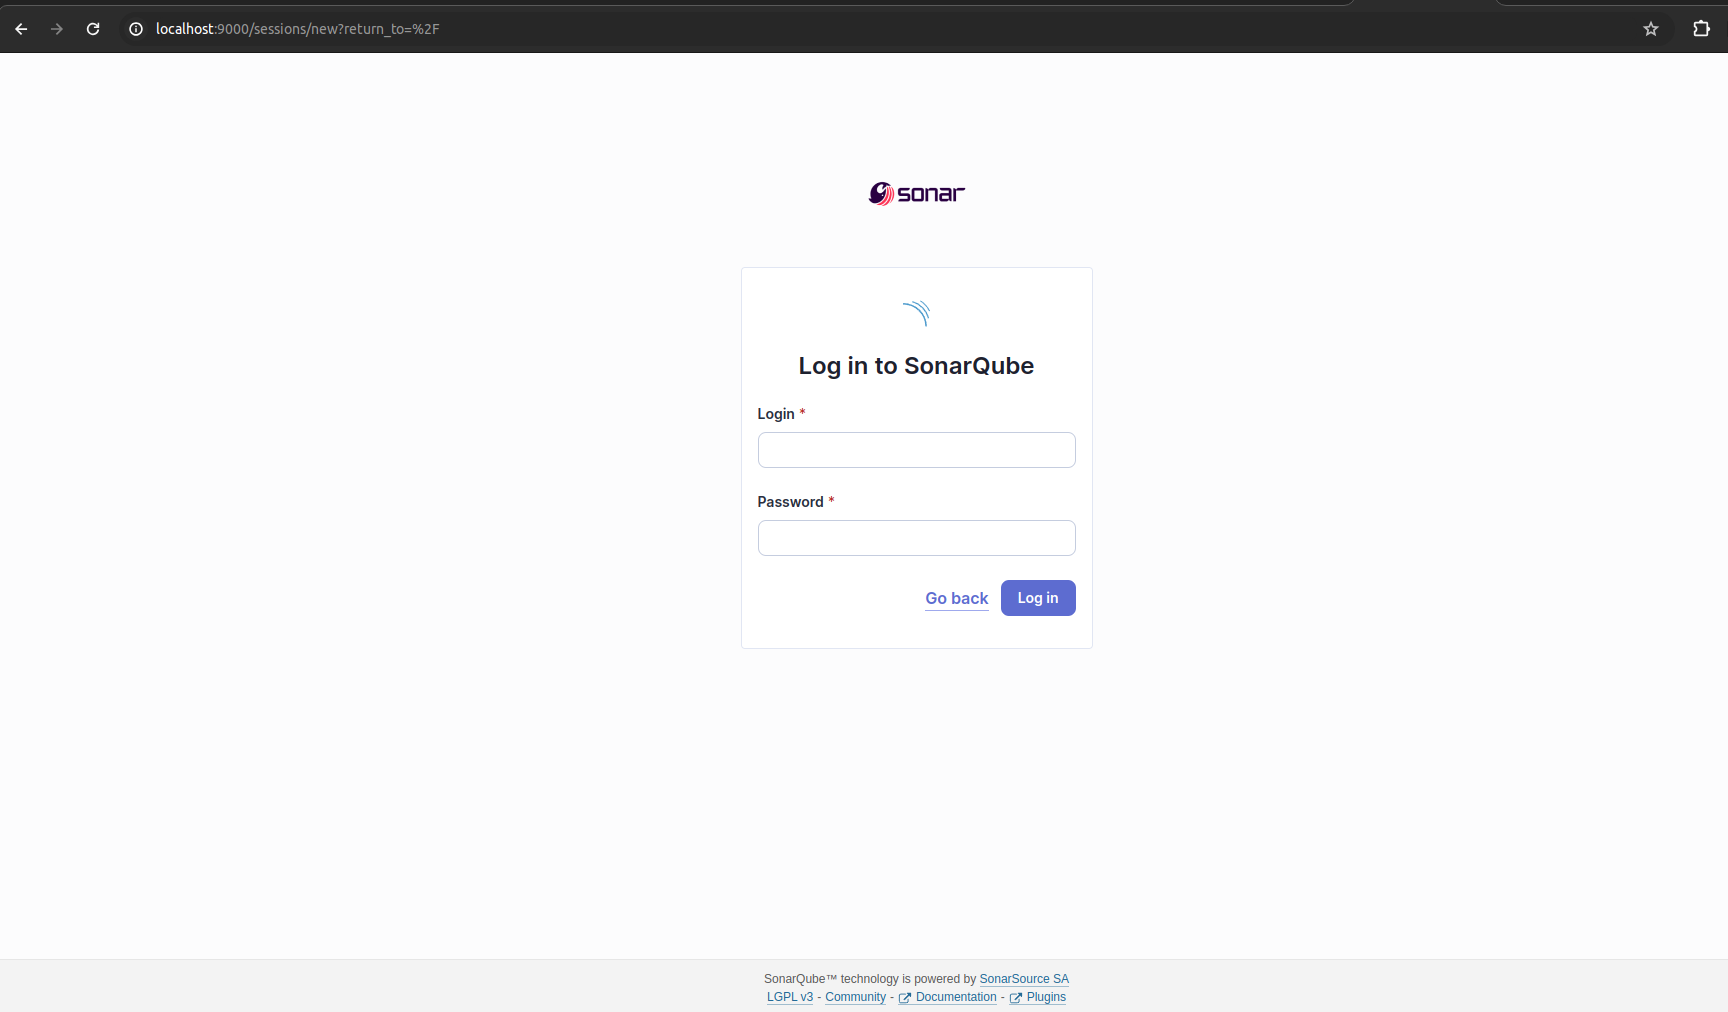

2. Give the credentials to login. If you are using this for the first time, then the login and password is admin/admin and you will be asked to set a new password.

3. Create a new local project
![Screenshot from 2024-03-25 17-19-28.png](<attachment:Screenshot from 2024-03-25 17-19-28.png>)
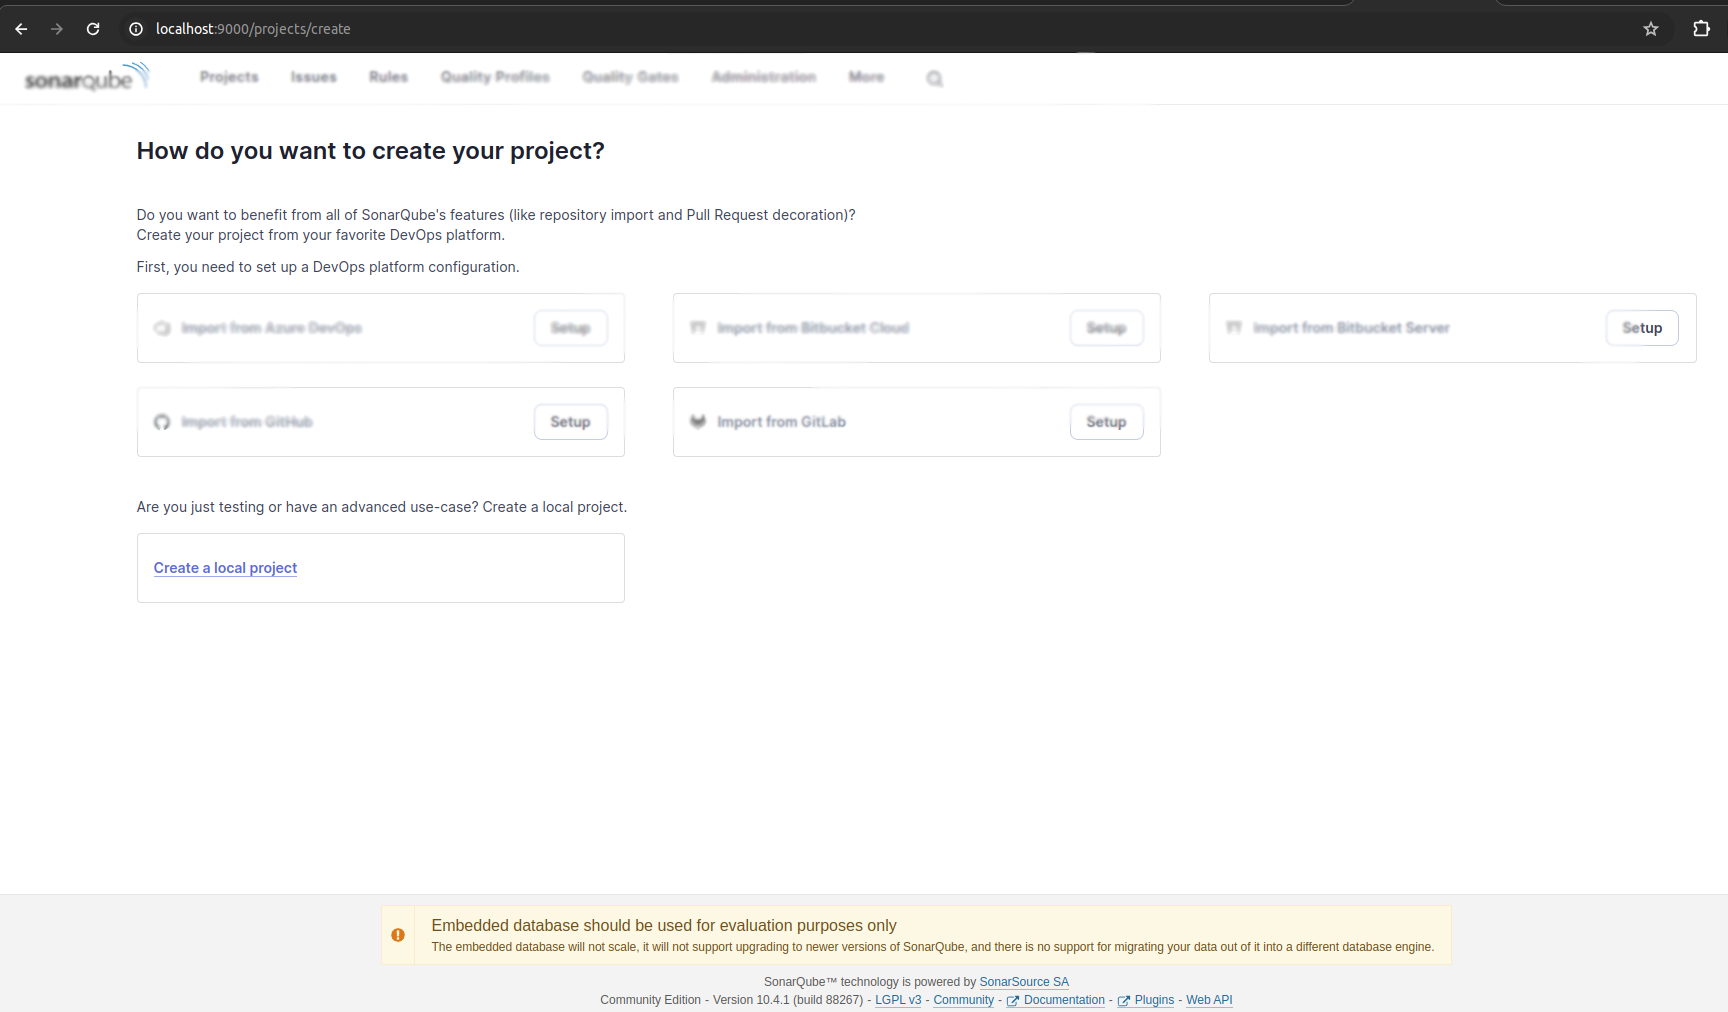

4. Fill in the details and click next
   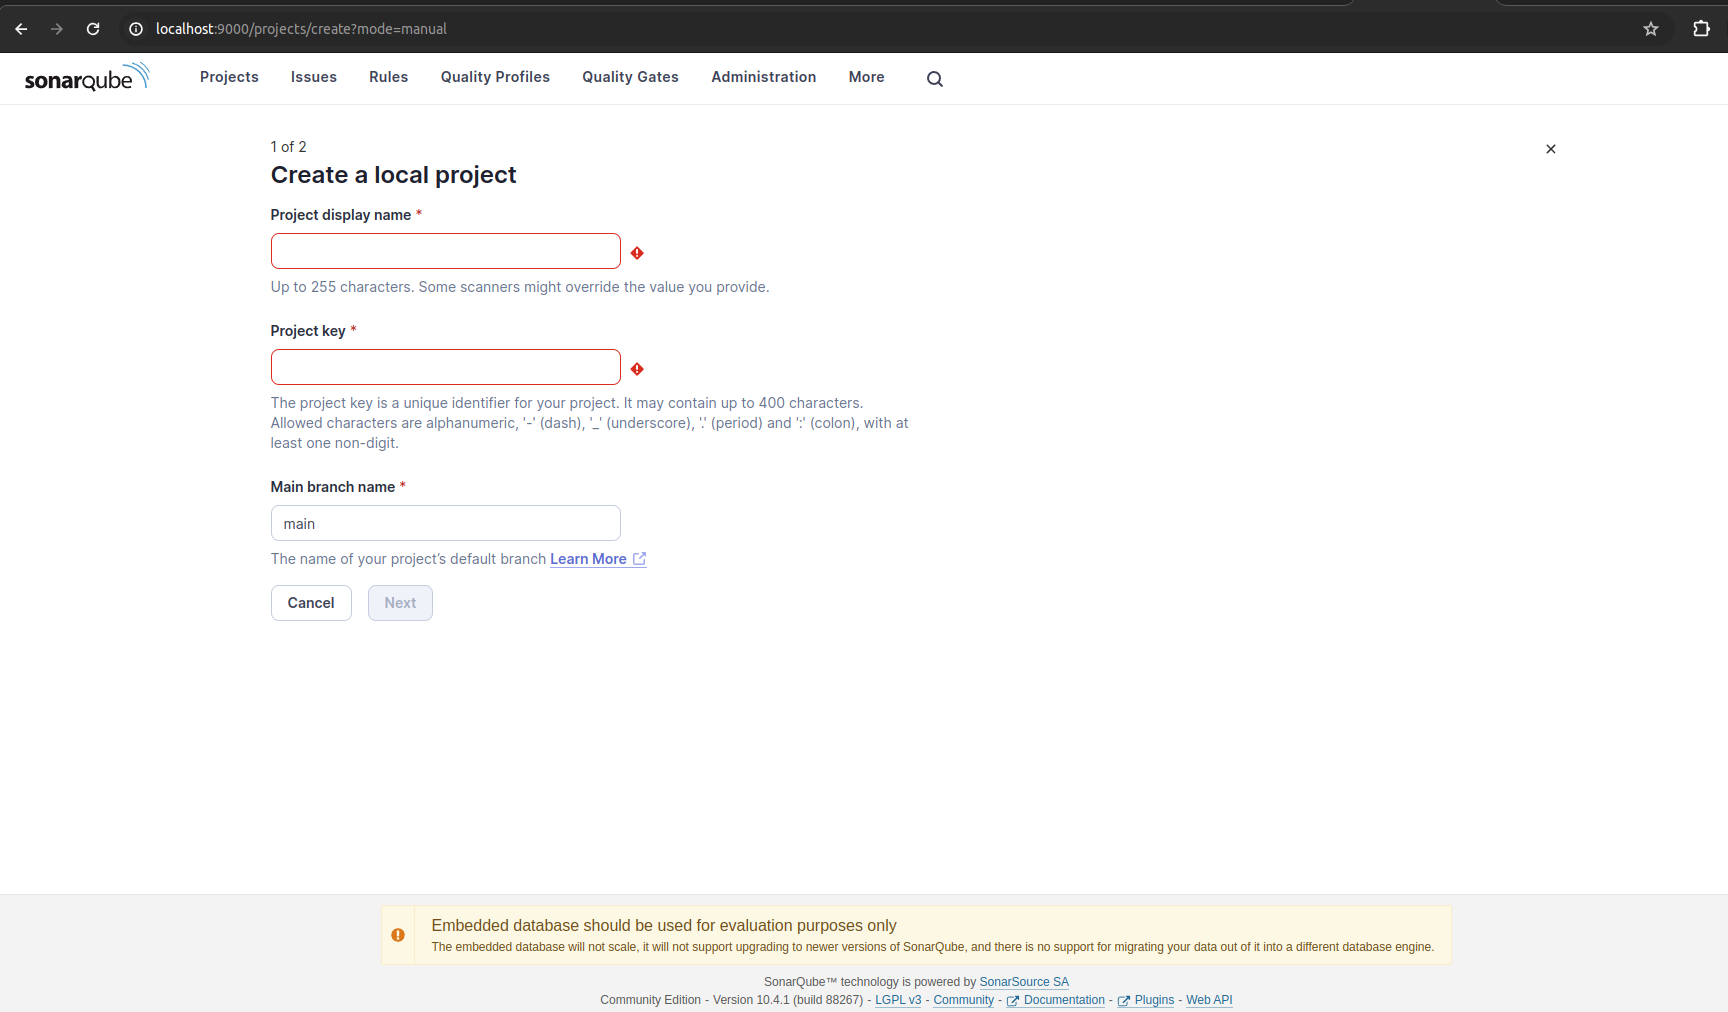

5. Choose baseline and click create project
   ![Screenshot from 2024-03-25 17-25-16.png](<attachment:Screenshot from 2024-03-25 17-25-16.png>)
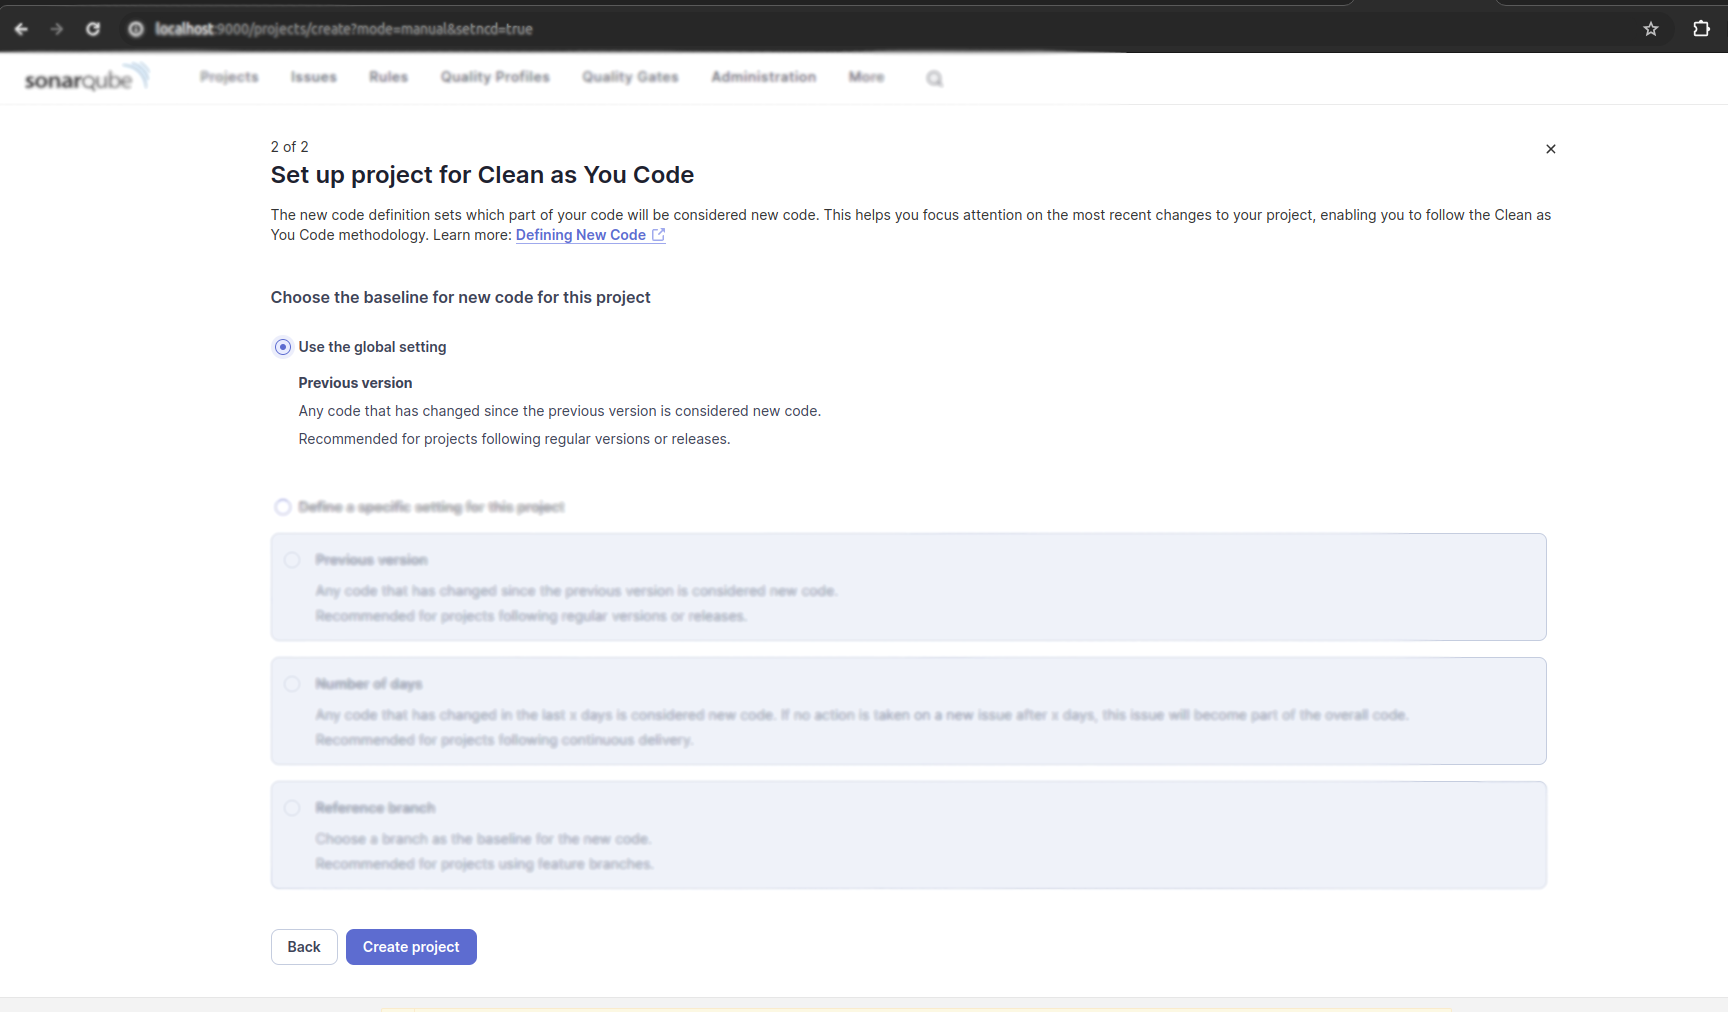

6. Select "Locally" analysis
   ![Screenshot from 2024-03-25 17-31-45.png](<attachment:Screenshot from 2024-03-25 17-31-45.png>)
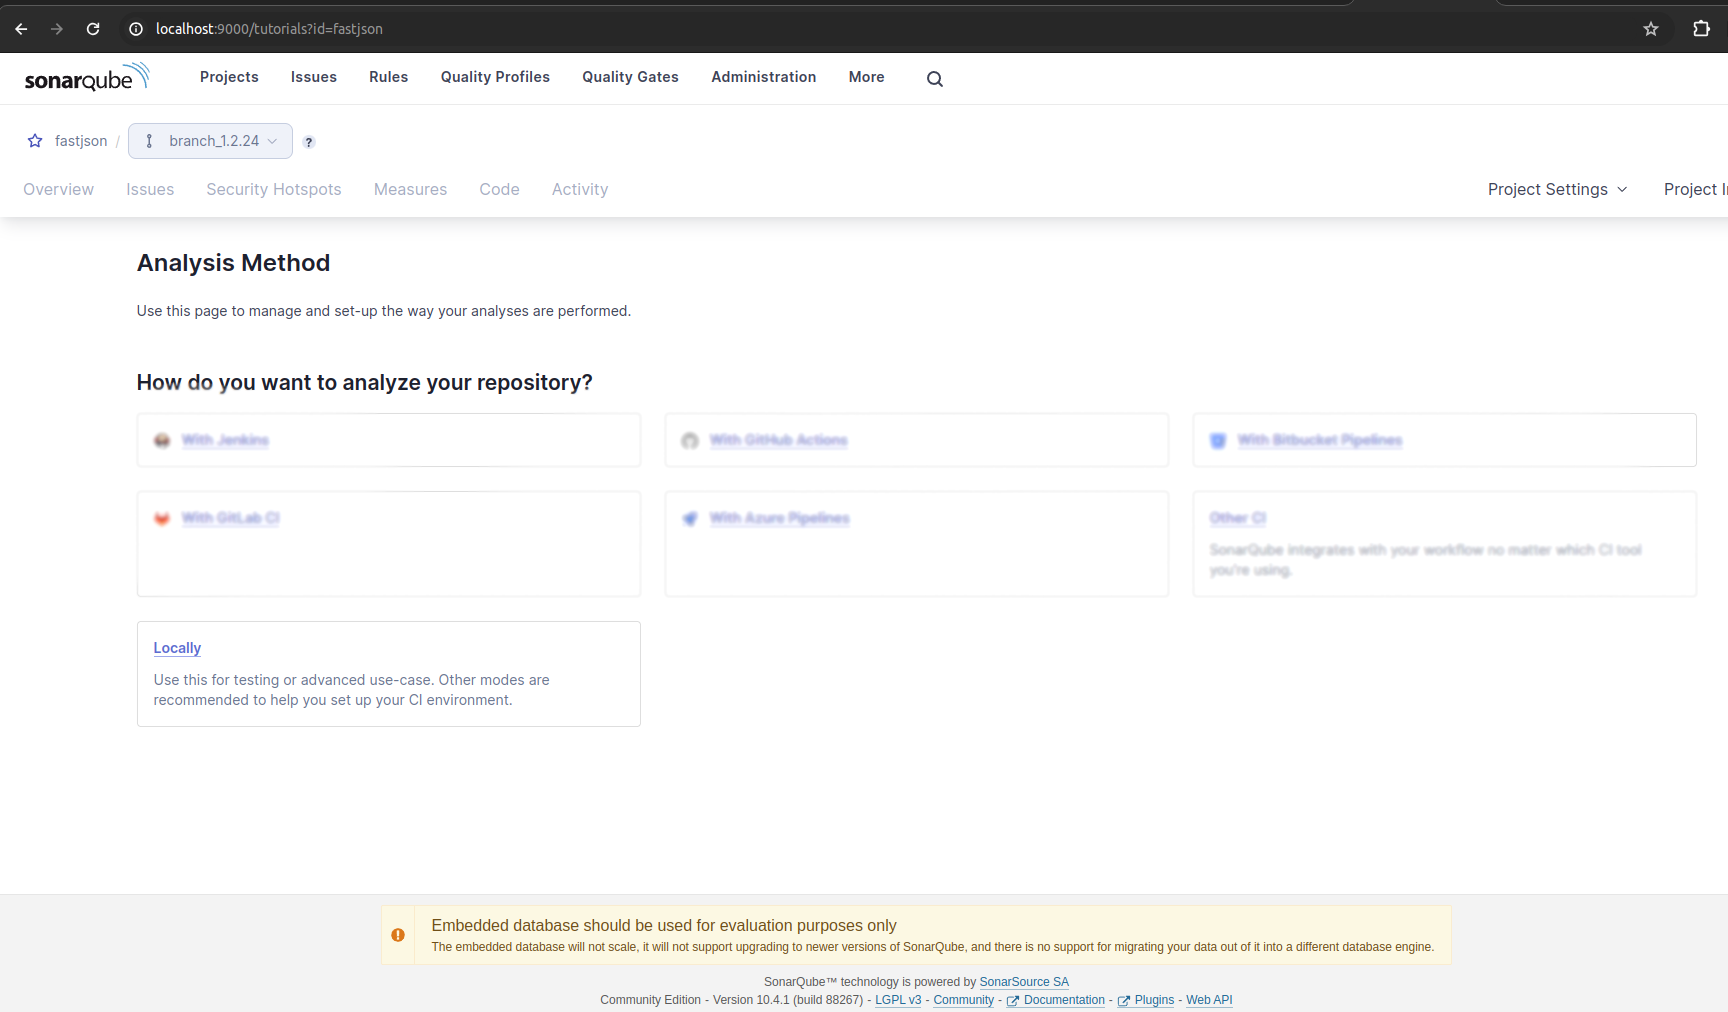

7. Click on Generate and click on continue. Make sure to save the token for future uses.
   ![Screenshot from 2024-03-25 17-33-38.png](<attachment:Screenshot from 2024-03-25 17-33-38.png>)
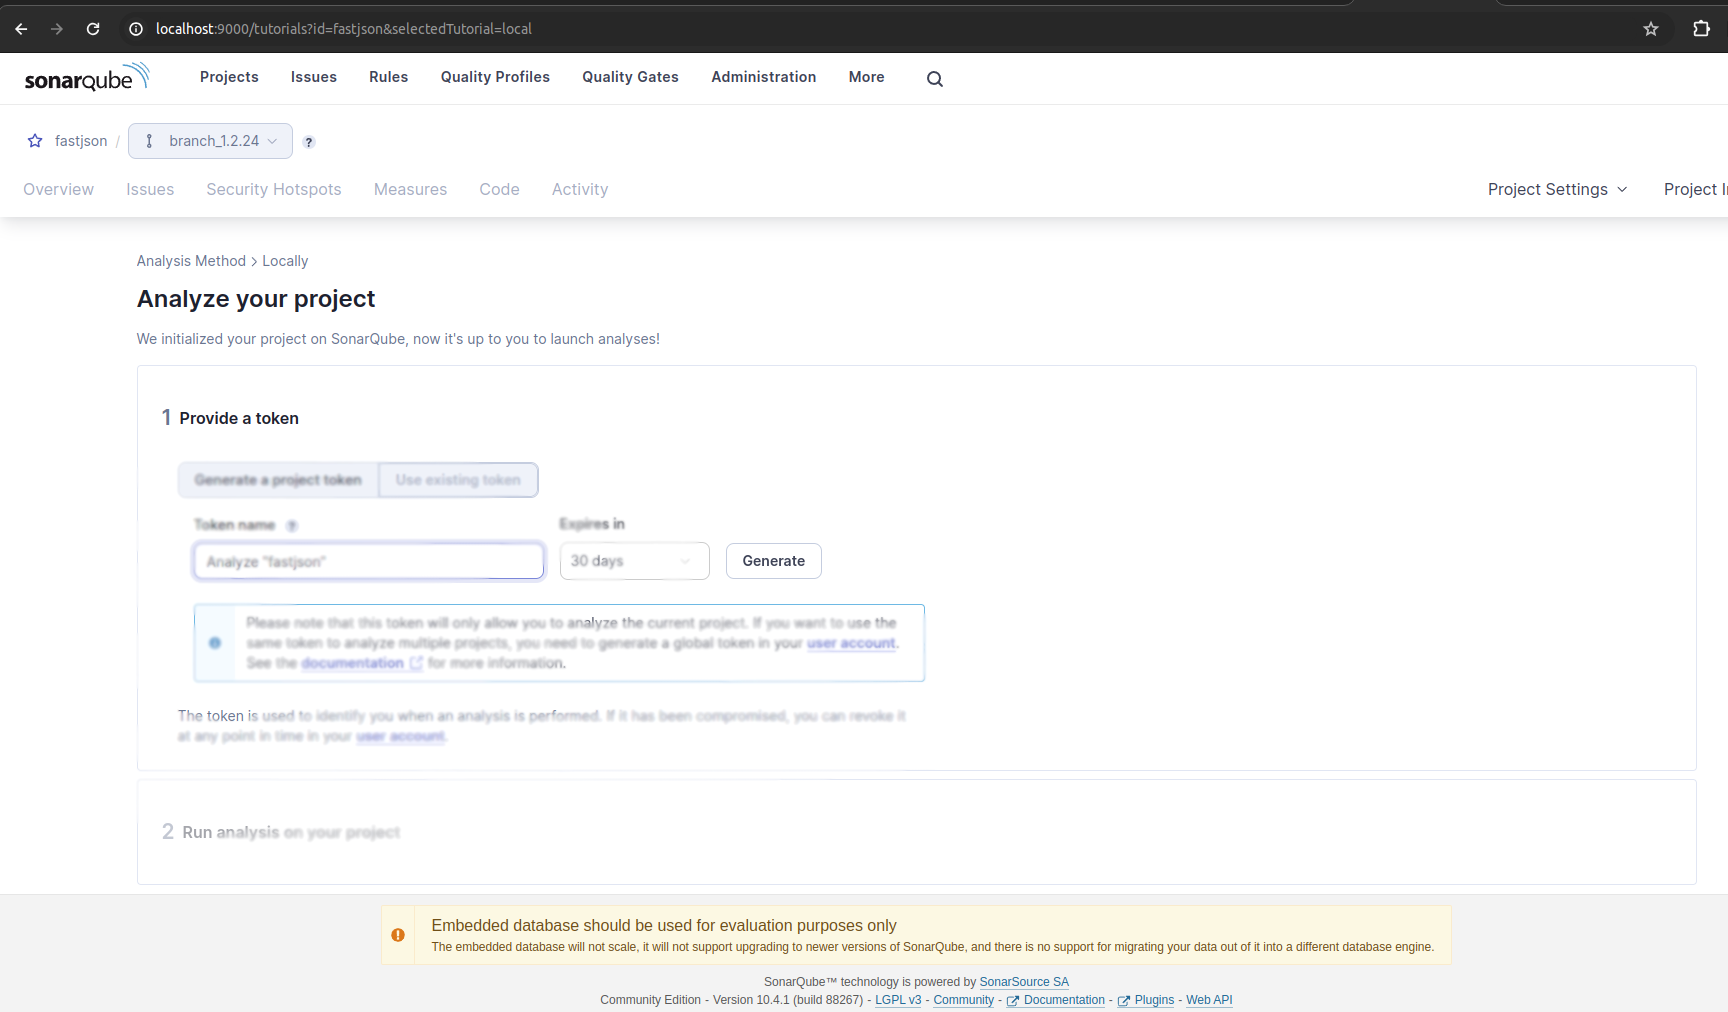

8. Run analysis
   